In [1]:
import numpy as np
import pandas as pd
import warnings
#%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:,.5f}".format

# Ejemplo parábola

In [2]:
vx = np.linspace(-3,5,100)
vy = [(x-1)**2 + 5 for x in vx]

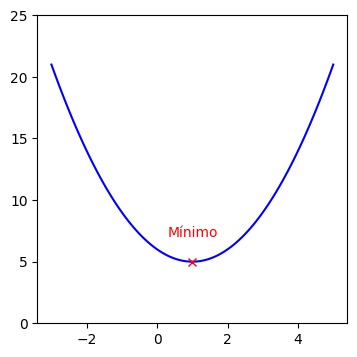

In [3]:
fig = plt.figure(figsize=(4.,4.))
ax = fig.add_subplot(1,1,1)
plt.plot(vx,vy,color="blue",label="Función cuadrática")
plt.plot(1,5, marker="x", color="red") #Gráfica de un punto
plt.annotate("Mínimo", (0.3*(1), 1.4*(5)),color="red")
plt.ylim(0,25)
#plt.legend(loc='best')
plt.show()

# Descenso por gradiente

In [4]:
x0 = np.asarray([4])
Gr = np.asarray([2*(x0[0]-1)])
l = 0.01
N = 1000
for i in range(N):
    x = x0 - l*Gr
    x0 = x.copy()
    Gr = np.asarray([2*(x0[0]-1)])
print("El punto en donde se encuentra el mínimo es igual a",x)

El punto en donde se encuentra el mínimo es igual a [1.00000001]


# Ejemplo paraboloide de revolución

In [5]:
x, y = np.mgrid[-3:4:100j, -3:3:100j] #xj indica el número de pasos
z = (x-1)**2 + y**2 + 5

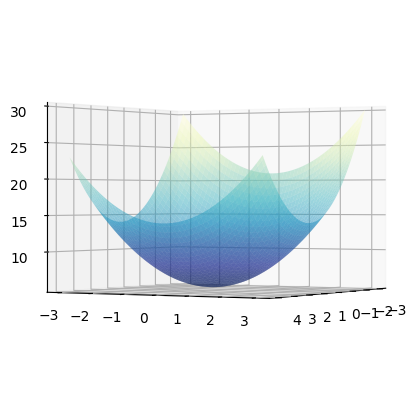

In [6]:
plt.rcParams["figure.figsize"] = [5, 5]
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r,alpha=0.5)
ax.view_init(0, 30)
plt.show()

# Descenso por gradiente 1

In [7]:
x0 = np.asarray([3,4])
Gr = np.asarray([2*(x0[0]-1),2*x0[1]])
l = 0.01
N = 1000
for i in range(N):
    x = x0 - l*Gr
    x0 = x.copy()
    Gr = np.asarray([2*(x0[0]-1),2*x0[1]])
print("El punto en donde se encuentra el mínimo es igual a",x)

El punto en donde se encuentra el mínimo es igual a [1.00000000e+00 6.73186943e-09]


# Descenso por gradiente 2

In [8]:
def f(x,y):
    z = (x-1)**2 + y**2 + 5
    return z
h = 0.001
#Algorimo descenso por gradiente
x0 = np.asarray([3,4])
Gr = np.asarray([ (f(x0[0]+h,x0[1]) - f(x0[0]-h,x0[1]))/(2*h) , (f(x0[0],x0[1]+h) - f(x0[0],x0[1]-h))/(2*h) ])
l = 0.01
N = 1000
for i in range(N):
    x = x0 - l*Gr
    x0 = x.copy()
    Gr = np.asarray([(f(x0[0]+h,x0[1]) - f(x0[0]-h,x0[1]))/(2*h),(f(x0[0],x0[1]+h) - f(x0[0],x0[1]-h))/(2*h)])
print("El punto en donde se encuentra el mínimo es igual a",x)

El punto en donde se encuentra el mínimo es igual a [1.00000000e+00 6.73186484e-09]


# Regresión lineal

In [11]:
x = [1,2,3]
y = [3,4,5]
z = x + y
print(z)

[1, 2, 3, 3, 4, 5]


In [12]:
w = 5*z
print(w)

[1, 2, 3, 3, 4, 5, 1, 2, 3, 3, 4, 5, 1, 2, 3, 3, 4, 5, 1, 2, 3, 3, 4, 5, 1, 2, 3, 3, 4, 5]


In [13]:
x = np.asarray([1,2,3])
y = np.asarray([3,4,5])
z = x + y
print(z)

[4 6 8]


In [14]:
w = 5*z
print(w)

[20 30 40]


In [16]:
v = x + 3
print(v)

[4 5 6]


In [17]:
x = [1,2,3]
v = x + 3

TypeError: can only concatenate list (not "int") to list

In [18]:
def GRL(xd,yd,m,b):
    n = len(xd)
    aux1, aux2 = [], []
    #for i in range(n):
    #    aux1.append((yd[i] - (m*xd[i]+b))*xd[i])
    #    aux2.append(yd[i] - (m*xd[i]+b))
    aux1 = (yd - (m*xd + b))*xd
    aux2 = yd - (m*xd + b)
    g1 = -(2/n)*np.sum(aux1)
    g2 = -(2/n)*np.sum(aux2)
    return np.asarray([g1,g2])

In [19]:
vx = np.linspace(0,10,100)
vy = [-2*x + 5 for x in vx]
x0 = np.asarray([1,1])
Gr = GRL(vx,vy,x0[0],x0[1])
l = 0.01
N = 1000
for i in range(N):
    #print(Gr,"_",x0)
    x1 = x0 - l*Gr
    x0 = x1.copy()
    Gr = GRL(vx,vy,x0[0],x0[1])
print("El punto en donde se encuentra el mínimo es igual a",x1)

El punto en donde se encuentra el mínimo es igual a [-1.99548466  4.96996983]
